----------------------------------
       1.Data Selection           
----------------------------------

    Seat No. PH-121 HS-101 CY-105 HS-105/12 MT-111 CS-105 CS-106 EL-102  \
0   CS-97001     B-     D+     C-         C     C-     D+      D     C-   
1   CS-97002      A      D     D+         D     B-      C      D      A   
2   CS-97003      A      B      A        B-     B+      A     B-     B+   
3   CS-97004      D     C+     D+         D      D     A-     D+     C-   
4   CS-97005     A-     A-     A-        B+      A      A     A-     B+   
5   CS-97006      A     B-      B        D+     C+     A-     C+      B   
6   CS-97007     B-     C-     A-         D     A-      B      A     B+   
7   CS-97008     B+     B+     C+         C      C     A-     C-     A-   
8   CS-97009     A-      C     A-        D+      B     A-     A-     A-   
9   CS-97010      A      B     C+         B      B     A-      C     B-   
10  CS-97011     A-     B-     B+        C-     C-     B-     C+     

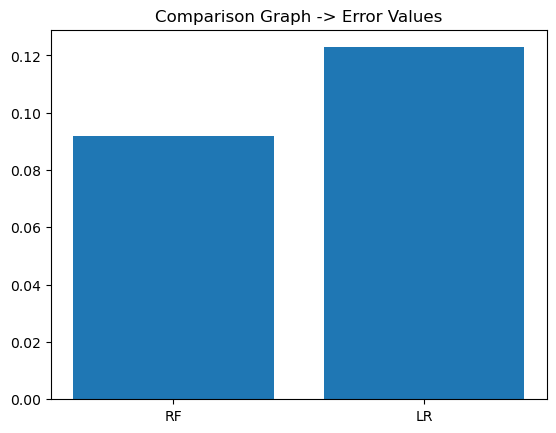

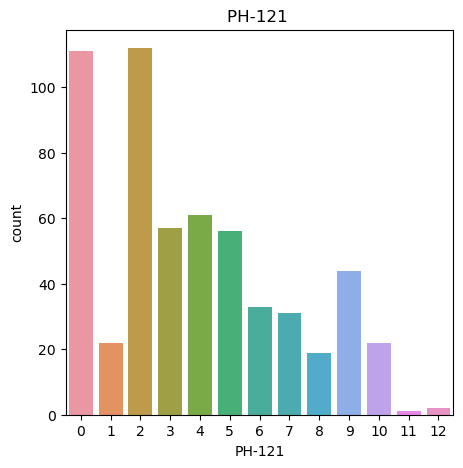

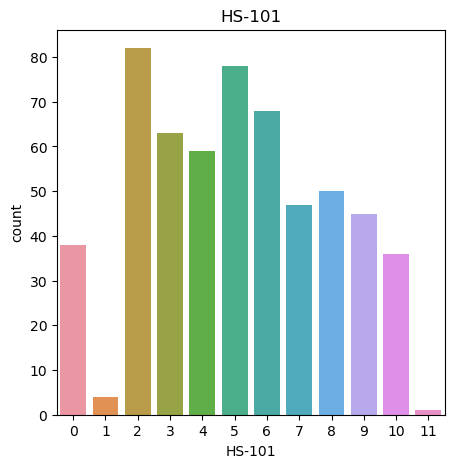

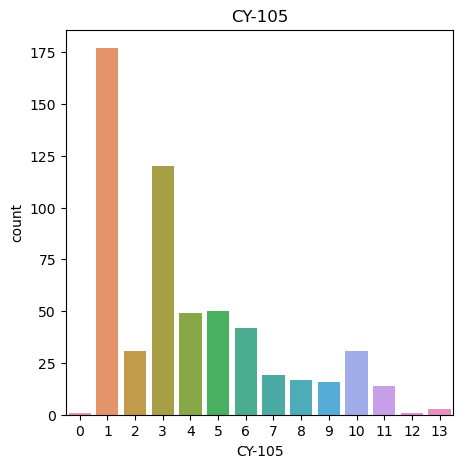

In [1]:
#======================= IMPORT PACKAGES =============================

import pandas as pd
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
from sklearn import preprocessing

#===================== DATA SELECTION ==============================

#=== READ A DATASET ====

data_frame=pd.read_csv("Grades.csv")
print("----------------------------------")
print("       1.Data Selection           ")
print("----------------------------------")
print()
print(data_frame.head(20))

#===================== DATA PREPROCESSING ==============================

#=== CHECK MISSING VALUES ===

print("=====================================================")
print("                    2.Preprocessing                  ")
print("=====================================================")
print()
print("--------------------------------------------")
print("     Checking missing values          ")
print("--------------------------------------------")
print()
print(data_frame.isnull().sum())
print()

data_frame=data_frame.fillna(0)
print("--------------------------------------------")
print("    After Checking missing values          ")
print("--------------------------------------------")
print()
print(data_frame.isnull().sum())
print()

#===  LABEL ENCODING ===

label_encoder = preprocessing.LabelEncoder() 

print("---------------------------------")
print(" Before label encoding ")
print("---------------------------------")
print()
print(data_frame['PH-121'].head(10))

objList = data_frame.select_dtypes(include = "object").columns

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for feat in objList:
    data_frame[feat] = le.fit_transform(data_frame[feat].astype(str))

print("-------------------------------------------")
print(" After label Encoding ")
print("------------------------------------------")
print()

print(data_frame['PH-121'].head(20))


#=============================== 3. DATA SPLITTING ============================

X=data_frame.drop('CGPA',axis=1)
y=data_frame['CGPA']

X_train, X_test,y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

print("--------------------------------------------")
print("Data Splitting")
print("--------------------------------------------")
print()
print("Total No.of data's in dataset  : ", data_frame.shape[0])
print()
print("Total No.of training data's   : ", X_train.shape[0])
print()
print("Total No.of testing data's    : ", X_test.shape[0])


#============================  5. CLASSIFICATION =============================

# ========== LINEAR REGRESSION =========

from sklearn import  linear_model, metrics
import numpy as np

# create linear regression object
reg = linear_model.LinearRegression()
  
# train the model using the training sets
reg.fit(X_train, y_train)

prd_lr=reg.predict(X_test)

print("-------------------------------------------")
print(" Linear Regression")
print("-------------------------------------------")
print()

Score_1=metrics.mean_absolute_error(y_test, prd_lr)
Acc_lr=100-Score_1
#Accuracy_1=100-Score_1
print('Mean Absolute Error:', Score_1)  
print()
print('Mean Squared Error:', metrics.mean_squared_error(y_test, prd_lr))  
print()
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, prd_lr))) 
print()
print("Accuracy = ",Acc_lr )


# ==== RANDOM FOREST ===


from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor()
 
# fit the regressor with x and y data
regressor.fit(X_train, y_train) 

Y_pred = regressor.predict(X_test)

error_rf=metrics.mean_absolute_error(y_test,Y_pred)

print("-------------------------------------------")
print(" Random Forest Regression")
print("-------------------------------------------")
print()

Score_rf=metrics.mean_absolute_error(y_test, Y_pred)
Acc_rf=100-Score_rf
#Accuracy_1=100-Score_1
print('Mean Absolute Error:', Score_rf)  
print()
print('Mean Squared Error:', metrics.mean_squared_error(y_test, Y_pred))  
print()
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, Y_pred))) 
print()
print("Accuracy = ",Acc_rf )

# ============== PREDICTION =====================

print("----------------------------------------")
print("PREDICTION ")
print("------------------------------------")
print()

for i in range(0,5):
    print("-----------------------")
    print([i],"CGPA = ",Y_pred[i] )
    print("------------------------")

# ===== COMPARISON =====

vals=[Score_rf,Score_1]
inds=range(len(vals))
labels=["RF","LR"]
fig,ax = plt.subplots()
rects = ax.bar(inds, vals)
ax.set_xticks([ind for ind in inds])
ax.set_xticklabels(labels)
plt.title("Comparison Graph -> Error Values")
plt.show()


import seaborn as sns
plt.figure(figsize=(5, 5))
plt.title("PH-121 ")
sns.countplot(x='PH-121',data=data_frame)
plt.show()

import seaborn as sns
plt.figure(figsize=(5, 5))
plt.title("HS-101")
sns.countplot(x='HS-101',data=data_frame)
plt.show()


import seaborn as sns
plt.figure(figsize=(5, 5))
plt.title("CY-105")
sns.countplot(x='CY-105',data=data_frame)
plt.show()